<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/2_Linear_Regression_Single_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving home_prices.csv to home_prices.csv


In [3]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "home_prices.csv" with length 77 bytes


In [4]:
df = pd.read_csv(io.StringIO(uploaded['home_prices.csv'].decode('utf-8')))
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


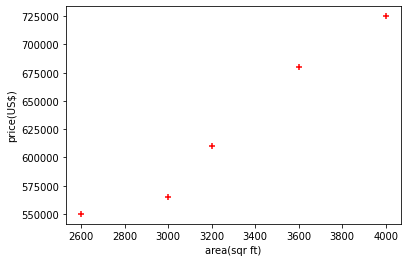

In [5]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price, color='red',marker='+')

In [6]:
#when run accurate means it will be ready to predict
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[3300]])

array([628715.75342466])

In [8]:
#lets look out the internal details
reg.coef_ #it will show the coefficient value which m => y = mx+b

array([135.78767123])

In [9]:
reg.intercept_ #it will show the value of b

180616.43835616432

In [10]:
#y = mx+c # x is the area which u predict
135.78767123*3300+180616.43835616432

628715.7534151643

In [11]:
#now for predecting 2nd value 
reg.predict([[5000]])

array([859554.79452055])

In [12]:
#lets look out the internal details
reg.coef_ #it will show the coefficient value which m => y = mx+b

array([135.78767123])

In [13]:
reg.intercept_ #it will show the value of b

180616.43835616432

In [14]:
#y = mx+c # x is the area which u predict
135.78767123*5000+180616.43835616432

859554.7945061643

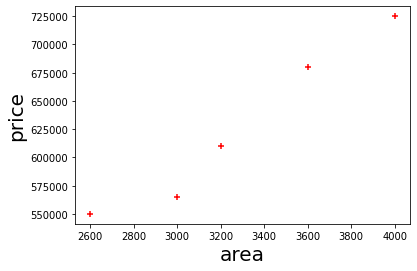

In [15]:
# i want to show my scattererd plot
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')

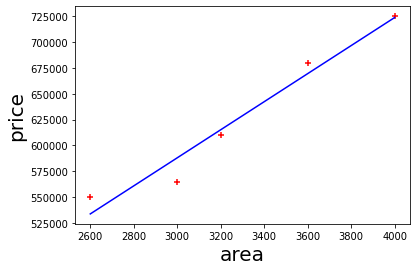

In [18]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [35]:
uploaded = files.upload()

Saving areas.csv to areas.csv


In [36]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "areas.csv" with length 84 bytes


In [37]:
uploaded

{'areas.csv': b'area\r\n1000\r\n1500\r\n2300\r\n3540\r\n4120\r\n4560\r\n5490\r\n3460\r\n4750\r\n2300\r\n9000\r\n8600\r\n7100\r\n'}

In [40]:
d = pd.read_csv(io.StringIO(uploaded['areas.csv'].decode('utf-8')))
d.head(3)

,area
0,1000
1,1500
2,2300


In [41]:
#now i will use regression model to actually predict
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [42]:
#for create now col assign p here
p = reg.predict(d)

In [43]:
d['prices'] = p

In [44]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [46]:
#to_csv to generate a new prediction
d.to_csv("prediction.csv", index=False)